In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pylab as pl
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import seaborn as sns
import itertools
import scipy.stats as scs
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.cm as cm
from IPython.display import HTML, display
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("all_domains.csv")

In [3]:
df.columns = df.columns.str.lstrip()

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.columns = df.columns.str.replace(" ", "_")

In [6]:
df.head(35)

,activity_type,user_id,rm_id,user_os,viewing_app,user_groups,shared_date,shared_time,title_of_content,share_channel,viewed,time_spent_in_seconds,last_activity_date,last_activity_time,unnamed:_14,unnamed:_15,unnamed:_16
0,VIEW,1051909.0,NaN,MAC_OS_X_IPHONE,APPLE_WEB_KIT,NaN,NaN,NaN,Mutual Fund Online - I,NaN,1.0,5.0,25-Aug-2017,19:29:04,NaN,NaN,NaN
1,VIEW,1052025.0,NaN,MAC_OS_X_IPHONE,APPLE_WEB_KIT,NaN,NaN,NaN,SWIFT CODES JPY,NaN,1.0,120.0,25-Aug-2017,9:53:39,NaN,SWIFT CODES JPY,NaN
2,VIEW,1052025.0,NaN,MAC_OS_X_IPHONE,APPLE_WEB_KIT,NaN,NaN,NaN,Q1FY17 Press Release_Final,NaN,1.0,120.0,25-Aug-2017,9:41:15,NaN,Q1FY17 Press Release_Final,NaN
3,SHARE,1057837.0,1051973.0,NaN,NaN,"All Users ,FA - NCR 2",23-Aug-2017,20:40:49,ICICI Pru Balanced,ANDROID,0.0,0.0,23-Aug-2017,20:40:49,NaN,GIB Knowledge Series,NaN
4,SHARE,1057837.0,1051973.0,NaN,NaN,"All Users ,FA - NCR 2",23-Aug-2017,20:40:49,ICICI Pru Balanced,ANDROID,0.0,0.0,23-Aug-2017,20:40:49,NaN,NaN,NaN
5,SHARE,1057837.0,1051973.0,NaN,NaN,"All Users ,FA - NCR 2",23-Aug-2017,20:40:49,ICICI Pru Balanced,ANDROID,0.0,0.0,23-Aug-2017,20:40:49,NaN,NaN,NaN
6,VIEW,1051973.0,NaN,ANDROID4,CHROME_MOBILE,NaN,NaN,NaN,ICICI Pru Balanced,NaN,1.0,120.0,23-Aug-2017,20:39:43,NaN,NaN,NaN
7,VIEW,1052025.0,NaN,MAC_OS_X_IPHONE,APPLE_WEB_KIT,NaN,NaN,NaN,GIB Knowledge Series,NaN,1.0,220.0,17-Aug-2017,20:43:48,NaN,GIB Knowledge Series,NaN
8,VIEW,1051913.0,NaN,MAC_OS_X_IPHONE,APPLE_WEB_KIT,NaN,NaN,NaN,Mutual Fund Online - I,NaN,1.0,5.0,12-Aug-2017,21:22:24,NaN,NaN,NaN
9,VIEW,1051913.0,NaN,MAC_OS_X_IPHONE,APPLE_WEB_KIT,NaN,NaN,NaN,Reliance Arbitrage Adv,NaN,1.0,10.0,12-Aug-2017,21:07:16,NaN,NaN,NaN


# EDA & Feature Engineering

In [7]:
df.user_os.unique()


array(['MAC_OS_X_IPHONE', nan, 'ANDROID4', 'ANDROID6', 'ANDROID_MOBILE',
       'ANDROID5', 'WINDOWS_10', 'WINDOWS_7', 'iOS9_IPHONE', 'MAC_OS_X',
       'WINDOWS_81', 'MAC_OS_X_IPAD', 'UBUNTU', 'LINUX', 'WINDOWS_XP',
       'CHROME_OS', 'ANDROID4_TABLET', 'WINDOWS_8', 'iOS8_1_IPAD'], dtype=object)

In [8]:
df.rename(columns={'user_os': 'viewing_device'}, inplace=True)
df["viewing_device"].replace({"MAC_OS_X" : "Laptop/Desktop", "WEB" : "Laptop/Desktop", "WINDOWS_10" : "Laptop/Desktop", "WINDOWS_7" : "Laptop/Desktop", "WINDOWS_81" : "Laptop/Desktop", "CHROME_OS" : "Laptop/Desktop"}, inplace = True)
df["viewing_device"].replace({"ANDROID_MOBILE" : "Phone", "ANDROID6" : "Phone", "ANDROID4" : "Phone", "ANDROID5" : "Phone","ANDROID7" : "Phone", "MAC_OS_X_IPHONE" : "Phone", "iOS7_IPHONE" : "Phone", "iOS8_1_IPHONE" : "Phone", "iOS8_3_IPHONE" : "Phone", "iOS9_IPHONE" : "Phone"}, inplace=True)
df["viewing_device"].replace({"ANDROID4_TABLET" : "Tablet", "ANDROID6_TABLET" : "Tablet", "iOS9_IPAD" : "Tablet", "MAC_OS_X_IPAD" : "Tablet"}, inplace = True)
df["viewing_device"].replace({"WINDOWS_7" : "Laptop/Desktop", "WINDOWS_10" : "Laptop/Desktop", "WINDOWS_81" : "Laptop/Desktop", "WINDOWS_XP" : "Laptop/Desktop", "LINUX" : "Laptop/Desktop", "UBUNTU" : "Laptop/Desktop", "MAC_OS_X" : "Laptop/Desktop"}, inplace = True)
df["viewing_device"].replace({"ANDROID_MOBILE" : "Phone", "ANDROID6" : "Phone", "ANDROID4" : "Phone", "ANDROID5" : "Phone","ANDROID7" : "Phone", "MAC_OS_X_IPHONE" : "Phone", "iOS7_IPHONE" : "Phone", "iOS8_1_IPHONE" : "Phone", "iOS8_3_IPHONE" : "Phone", "iOS9_IPHONE" : "Phone"}, inplace=True)
df["viewing_device"].replace({"ANDROID4_TABLET" : "Tablet", "ANDROID6_TABLET" : "Tablet", "iOS8_1_IPAD" : "Tablet", "MAC_OS_X_IPAD" : "Tablet"}, inplace = True)
df["viewing_device"].replace({"MAC_OS_X" : "Laptop/Desktop", "WINDOWS_XP" : "Laptop/Desktop", "WINDOWS_8" : "Laptop/Desktop", "WINDOWS_10" : "Laptop/Desktop", "WINDOWS_7" : "Laptop/Desktop", "WINDOWS_81" : "Laptop/Desktop", "CHROME_OS" : "Laptop/Desktop"}, inplace = True)
df["viewing_device"].replace({"ANDROID_MOBILE" : "Phone", "ANDROID6" : "Phone", "ANDROID4" : "Phone", "ANDROID5" : "Phone","ANDROID7" : "Phone", "MAC_OS_X_IPHONE" : "Phone", "iOS7_IPHONE" : "Phone", "iOS8_1_IPHONE" : "Phone", "iOS8_3_IPHONE" : "Phone", "iOS9_IPHONE" : "Phone"}, inplace=True)
df["viewing_device"].replace({"ANDROID4_TABLET" : "Tablet", "ANDROID6_TABLET" : "Tablet", "iOS8_1_IPAD" : "Tablet", "MAC_OS_X_IPAD" : "Tablet"}, inplace = True)
df["viewing_device"].replace({"WINDOWS_7" : "Laptop/Desktop", "WINDOWS_10" : "Laptop/Desktop", "MAC_OS_X" : "Laptop/Desktop"}, inplace = True)
df["viewing_device"].replace({"ANDROID_MOBILE" : "Phone", "ANDROID6" : "Phone", "ANDROID4" : "Phone", "ANDROID5" : "Phone", "MAC_OS_X_IPHONE" : "Phone", "iOS9_IPHONE" : "Phone", "iOS8_1_IPHONE" : "Phone", "iOS8_3_IPHONE" : "Phone", "iOS9_IPHONE" : "Phone"}, inplace=True)

In [9]:
df.viewing_app.unique()

array(['APPLE_WEB_KIT', nan, 'CHROME_MOBILE', 'MOBILE_SAFARI', 'CHROME',
       'EDGE14', 'CHROME51', 'IE11', 'CHROME49', 'FIREFOX', 'CHROME45',
       'SAFARI', 'EDGE', 'CHROME47', 'EDGE13', 'IE10', 'CHROME33',
       'CHROME48', 'CHROME42', 'FIREFOX43', 'FIREFOX47', 'EDGE12', 'IE7',
       'SAFARI9', 'CHROME38', 'FIREFOX44', 'FIREFOX37', 'CHROME30',
       'FIREFOX34', 'SAFARI5', 'FIREFOX48', 'FIREFOX46', 'CHROME41',
       'CHROME28'], dtype=object)

In [10]:
df.rename(columns={'viewing_app': 'browser'}, inplace=True)
df["browser"].replace({"CHROME45" : "CHROME", "CHROME49" : "CHROME", "CHROME41" : "CHROME", "CHROME48" : "CHROME", "CHROME28" : "CHROME", "FIREFOX34" : "FIREFOX", "FIREFOX46" : "FIREFOX", "FIREFOX48" : "FIREFOX", "EDGE12" : "EDGE"}, inplace = True)
df["browser"].replace({"IE11" : "IE", "IE7" : "IE", "EDGE14" : "EDGE", "SAFARI5" : "SAFARI", "SAFARI9" : "SAFARI"}, inplace=True)
df["browser"].replace({"CHROME45" : "CHROME", "CHROME49" : "CHROME", "CHROME41" : "CHROME", "CHROME48" : "CHROME", "CHROME28" : "CHROME", "FIREFOX34" : "FIREFOX", "FIREFOX46" : "FIREFOX", "FIREFOX48" : "FIREFOX", "EDGE12" : "EDGE"}, inplace = True)
df["browser"].replace({"EDGE13" : "EDGE", "EDGE14" : "EDGE", "SAFARI5" : "SAFARI", "SAFARI9" : "SAFARI"}, inplace=True)
df["browser"].replace({"CHROME45" : "CHROME", "CHROME51" : "CHROME", "CHROME33" : "CHROME", "CHROME30" : "CHROME", "CHROME47" : "CHROME", "CHROME49" : "CHROME", "CHROME42" : "CHROME", "CHROME48" : "CHROME", "CHROME38" : "CHROME", "FIREFOX44" : "FIREFOX", "FIREFOX47" : "FIREFOX", "FIREFOX43" : "FIREFOX", "FIREFOX37" : "FIREFOX", "EDGE12" : "EDGE"}, inplace = True)
df["browser"].replace({"EDGE13" : "EDGE", "EDGE14" : "EDGE", "IE7" : "IE", "IE10" : "IE", "IE11" : "IE", "SAFARI9" : "SAFARI", "APPLE_WEB_KIT" : "SAFARI"}, inplace=True)
df["browser"].replace({"CHROME45" : "CHROME", "CHROME51" : "CHROME", "CHROME33" : "CHROME", "CHROME30" : "CHROME", "CHROME47" : "CHROME", "CHROME49" : "CHROME", "CHROME42" : "CHROME", "CHROME48" : "CHROME", "CHROME38" : "CHROME", "FIREFOX44" : "FIREFOX", "FIREFOX47" : "FIREFOX", "FIREFOX43" : "FIREFOX", "FIREFOX37" : "FIREFOX", "EDGE12" : "EDGE"}, inplace = True)
df["browser"].replace({"EDGE13" : "EDGE", "EDGE14" : "EDGE", "IE7" : "IE", "IE10" : "IE", "IE11" : "IE", "SAFARI9" : "SAFARI", "APPLE_WEB_KIT" : "SAFARI"}, inplace=True)

df.browser.unique()

array(['SAFARI', nan, 'CHROME_MOBILE', 'MOBILE_SAFARI', 'CHROME', 'EDGE',
       'IE', 'FIREFOX'], dtype=object)

In [11]:
df.viewing_device.unique()

array(['Phone', nan, 'Laptop/Desktop', 'Tablet'], dtype=object)

In [12]:
df["shared_date"] = pd.to_datetime(df["shared_date"], format="%d-%b-%Y")

In [13]:
df["last_activity_date"] = pd.to_datetime(df["last_activity_date"], format="%d-%b-%Y")

In [14]:
df['weekday'] = df['last_activity_date'].dt.dayofweek
df["weekday_name"] = df['last_activity_date'].dt.weekday_name
df["month"] = df['last_activity_date'].dt.month
df["time_of_day"] = pd.to_datetime(df['last_activity_time'], format='%H:%M:%S').dt.hour
df.time_of_day.unique()

array([ 19.,   9.,  20.,  21.,  22.,  11.,  18.,  17.,  16.,  15.,  14.,
        13.,  12.,  10.,  23.,   8.,   2.,   0.,   1.,   7.,   5.,   6.,
         4.,   3.,  nan])

In [15]:
# 1: Night(Midnight to 6 am), 2: Morning(6 am to Noon), 3: Afternoon(Noon to 6 pm), 4: Evening(6 pm to Midnight)
df["time_of_day"].replace({0 : 3, 1 : 3, 2 : 3, 3 : 3, 4 : 3, 5 : 3}, inplace = True)
df["time_of_day"].replace({6 : 4, 7 : 4, 8 : 4, 9 : 4, 10 : 4, 11 : 4}, inplace = True)
df["time_of_day"].replace({12 : 1, 13 : 1, 14 : 1, 15 : 1, 16 : 1, 17 : 1}, inplace = True)
df["time_of_day"].replace({18 : 2, 19 : 2, 20 : 2, 21 : 2, 22 : 2, 23 : 2}, inplace = True)
df.time_of_day.unique()

array([  2.,   4.,   1.,   3.,  nan])

In [16]:
df['hour'] = pd.to_datetime(df['last_activity_time'], format='%H:%M:%S').dt.hour

In [17]:
df.viewed.unique()

array([  1.,   0.,  nan])

In [18]:
df["time_spent_mins"] = df["time_spent_in_seconds"]/60.

In [19]:
df["time_spent_mins"] = (df["time_spent_mins"]-df["time_spent_mins"].mean())/float(df["time_spent_mins"].std())

In [20]:
hour_grouped = df.groupby("time_of_day")["time_spent_mins"].sum()

In [21]:
# plot = plt.bar(xrange(0,4),(df.groupby("time_of_day")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])


In [22]:
#sns.distplot(df["time_spent_mins"], color="m")
df.columns


Index([u'activity_type', u'user_id', u'rm_id', u'viewing_device', u'browser',
       u'user_groups', u'shared_date', u'shared_time', u'title_of_content',
       u'share_channel', u'viewed', u'time_spent_in_seconds',
       u'last_activity_date', u'last_activity_time', u'unnamed:_14',
       u'unnamed:_15', u'unnamed:_16', u'weekday', u'weekday_name', u'month',
       u'time_of_day', u'hour', u'time_spent_mins'],
      dtype='object')

6567

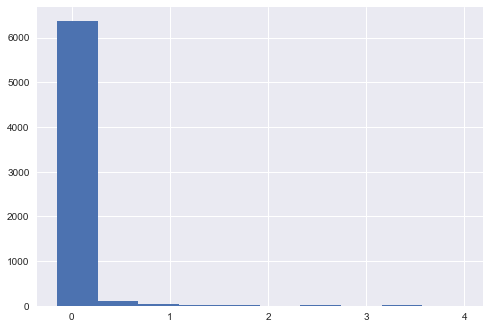

In [23]:
df = df[df["time_spent_mins"] <= 4]
plot = plt.hist(df["time_spent_mins"])
#plt.boxplot(new_df["time_spent_mins"])

len(df) 
# 1917 (22% reduced)
#sns.distplot(new_df["time_spent_mins"], color="g")

In [73]:
temp = 0
for index, row in df.iterrows():
    if row["activity_type"] == "SHARE":
        temp = row["shared_date"]
    else:
        if temp == 0:
            row["shared_date"] = row["last_activity_date"]
        else:
            row["shared_date"] = temp         

In [74]:
df['num_of_day_from_share_view'] = (df["last_activity_date"] - df["shared_date"]).astype(dt.timedelta).map(lambda x: 0 if pd.isnull(x) else x.days)


In [75]:
df = df[df['num_of_day_from_share_view']<2]

In [76]:
len(df)

6336

# SHARE DATA ANALYSIS

In [77]:
share_df = df[df.activity_type == "SHARE"]
share_df.columns

Index([u'activity_type', u'user_id', u'rm_id', u'viewing_device', u'browser',
       u'user_groups', u'shared_date', u'shared_time', u'title_of_content',
       u'share_channel', u'viewed', u'time_spent_in_seconds',
       u'last_activity_date', u'last_activity_time', u'unnamed:_14',
       u'unnamed:_15', u'unnamed:_16', u'weekday', u'weekday_name', u'month',
       u'time_of_day', u'hour', u'time_spent_mins',
       u'num_of_day_from_share_view'],
      dtype='object')

In [78]:
y_time_spent = share_df.groupby("weekday")["time_spent_mins"].sum()

In [79]:
#sns.stripplot(x=share_df["weekday_name"], y=share_df["time_spent_mins"], data=share_df, jitter=True)

In [181]:
len(share_df), len(share_df.rm_id.unique())

(1325, 86)

In [81]:
from collections import Counter
user_id_list_sh = [j.rm_id for i,j in df.iterrows() if j["activity_type"] == "SHARE"]
num_shares = Counter(user_id_list_sh)
num_shares

Counter({1286.0: 7,
         197521.0: 48,
         205963.0: 22,
         211675.0: 14,
         228993.0: 3,
         229551.0: 79,
         230605.0: 1,
         346016.0: 13,
         1050918.0: 38,
         1051427.0: 1,
         1051885.0: 3,
         1051893.0: 8,
         1051897.0: 4,
         1051905.0: 3,
         1051909.0: 2,
         1051913.0: 2,
         1051917.0: 3,
         1051921.0: 1,
         1051925.0: 3,
         1051929.0: 6,
         1051933.0: 2,
         1051937.0: 10,
         1051945.0: 1,
         1051949.0: 2,
         1051953.0: 2,
         1051973.0: 6,
         1051977.0: 2,
         1051981.0: 6,
         1051993.0: 2,
         1052001.0: 1,
         1052005.0: 3,
         1052009.0: 1,
         1052021.0: 1,
         1052025.0: 5,
         1052029.0: 5,
         1052349.0: 4,
         2386439.0: 5,
         2525350.0: 41,
         2685665.0: 49,
         2692754.0: 5,
         2733028.0: 5,
         2745016.0: 72,
         2745022.0: 1,
         27

In [82]:
for i,j in share_df.iterrows():
    if j["rm_id"] in num_shares:
        share_df.loc[i,"num_of_shares"] = num_shares[j["rm_id"]]

In [96]:
share_df.head()

,activity_type,user_id,rm_id,viewing_device,browser,user_groups,shared_date,shared_time,title_of_content,share_channel,...,unnamed:_15,unnamed:_16,weekday,weekday_name,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view,num_of_shares
3,SHARE,1057837.0,1051973.0,NaN,NaN,"All Users ,FA - NCR 2",2017-08-23,20:40:49,ICICI Pru Balanced,ANDROID,...,GIB Knowledge Series,NaN,2.0,Wednesday,8.0,2.0,20.0,-0.148806,0,6.0
4,SHARE,1057837.0,1051973.0,NaN,NaN,"All Users ,FA - NCR 2",2017-08-23,20:40:49,ICICI Pru Balanced,ANDROID,...,NaN,NaN,2.0,Wednesday,8.0,2.0,20.0,-0.148806,0,6.0
5,SHARE,1057837.0,1051973.0,NaN,NaN,"All Users ,FA - NCR 2",2017-08-23,20:40:49,ICICI Pru Balanced,ANDROID,...,NaN,NaN,2.0,Wednesday,8.0,2.0,20.0,-0.148806,0,6.0
17,SHARE,1057621.0,1051897.0,NaN,NaN,"All Users ,FA - NCR 3",2017-08-09,10:57:24,SBI Bluechip Reg,ANDROID,...,NaN,NaN,2.0,Wednesday,8.0,2.0,20.0,-0.139322,0,4.0
20,SHARE,1057769.0,1052025.0,NaN,NaN,"All Users ,FA - GIB",2017-08-09,18:31:45,SWIFT CODES USD,IOS,...,NaN,NaN,2.0,Wednesday,8.0,2.0,18.0,-0.123909,0,5.0


In [142]:
share_df.columns

Index([u'activity_type', u'user_id', u'rm_id', u'viewing_device', u'browser',
       u'user_groups', u'shared_date', u'shared_time', u'title_of_content',
       u'share_channel', u'viewed', u'time_spent_in_seconds',
       u'last_activity_date', u'last_activity_time', u'unnamed:_14',
       u'unnamed:_15', u'unnamed:_16', u'weekday', u'weekday_name', u'month',
       u'time_of_day', u'hour', u'time_spent_mins',
       u'num_of_day_from_share_view', u'num_of_shares'],
      dtype='object')

In [143]:
dummies = pd.get_dummies(share_df, columns=["weekday_name", "time_of_day", "share_channel"])

In [158]:
new_share_df = pd.concat([share_df, dummies])
new_share_df = new_share_df.drop(["weekday_name", "time_of_day", "share_channel"], axis=1)
new_share_df.fillna(0, inplace = True)
new_share_df.columns

Index([u'activity_type', u'browser', u'hour', u'last_activity_date',
       u'last_activity_time', u'month', u'num_of_day_from_share_view',
       u'num_of_shares', u'rm_id', u'share_channel_ANDROID',
       u'share_channel_IOS', u'share_channel_OUTLOOK', u'share_channel_WEB',
       u'shared_date', u'shared_time', u'time_of_day_1.0', u'time_of_day_2.0',
       u'time_of_day_3.0', u'time_of_day_4.0', u'time_spent_in_seconds',
       u'time_spent_mins', u'title_of_content', u'unnamed:_14', u'unnamed:_15',
       u'unnamed:_16', u'user_groups', u'user_id', u'viewed',
       u'viewing_device', u'weekday', u'weekday_name_Friday',
       u'weekday_name_Monday', u'weekday_name_Saturday',
       u'weekday_name_Sunday', u'weekday_name_Thursday',
       u'weekday_name_Tuesday', u'weekday_name_Wednesday'],
      dtype='object')

In [174]:
from sklearn.ensemble import RandomForestRegressor
x = new_share_df.as_matrix([u'num_of_shares', u'share_channel_ANDROID', 'viewed',
       u'share_channel_IOS', u'share_channel_OUTLOOK', u'share_channel_WEB',
       u'time_of_day_1.0', u'time_of_day_2.0',
       u'time_of_day_3.0', u'time_of_day_4.0',u'weekday_name_Friday',
       u'weekday_name_Monday', u'weekday_name_Saturday',
       u'weekday_name_Sunday', u'weekday_name_Thursday',
       u'weekday_name_Tuesday', u'weekday_name_Wednesday'
       ])


In [175]:
y = new_share_df.as_matrix(["time_spent_mins"])

In [176]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x,y)
x1_train, y_train

(array([[ 104.,    0.,    1., ...,    1.,    0.,    0.],
        [  79.,    0.,    1., ...,    0.,    0.,    0.],
        [   6.,    0.,    0., ...,    0.,    0.,    0.],
        ..., 
        [  11.,    0.,    1., ...,    0.,    0.,    1.],
        [  64.,    0.,    1., ...,    0.,    0.,    0.],
        [  12.,    0.,    1., ...,    0.,    0.,    0.]]),
 array([[-0.12035266],
        [-0.10375472],
        [-0.10968256],
        ..., 
        [-0.14880628],
        [-0.00535264],
        [-0.14406401]]))

In [177]:
rf = RandomForestRegressor(n_estimators = 5)

In [183]:
rf.fit(x1_train, y1_train)
y1_pred = rf.predict(x1_test)
rf.score(x1_test, y1_test)

/Users/urmimukherjee/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


-0.040400439506169228

In [179]:
# sns.distplot(share_df["num_of_day_from_share_view"], color="m")

(array([ 1253.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    72.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

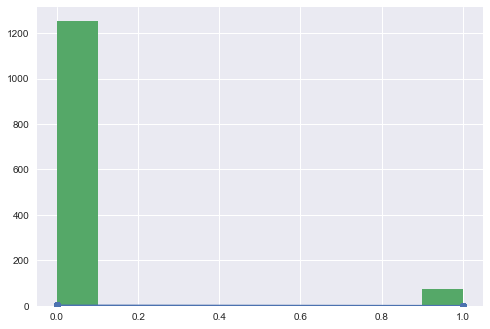

In [180]:
import pylab as pl
h = sorted(share_df["num_of_day_from_share_view"])  #sorted

fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h)

In [37]:
share_df.columns


Index([u'activity_type', u'user_id', u'rm_id', u'viewing_device', u'browser',
       u'user_groups', u'shared_date', u'shared_time', u'title_of_content',
       u'share_channel', u'viewed', u'time_spent_in_seconds',
       u'last_activity_date', u'last_activity_time', u'unnamed:_14',
       u'unnamed:_15', u'unnamed:_16', u'weekday', u'weekday_name', u'month',
       u'time_of_day', u'hour', u'time_spent_mins',
       u'num_of_day_from_share_view', u'num_of_shares'],
      dtype='object')

<Container object of 7 artists>

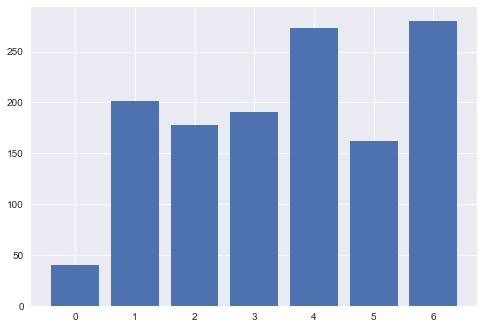

In [38]:
plt.bar(xrange(0,len(share_df.groupby("month")["rm_id"].count())), share_df.groupby("month")["rm_id"].count())

<module 'pylab' from '/Users/urmimukherjee/anaconda2/lib/python2.7/site-packages/pylab.pyc'>

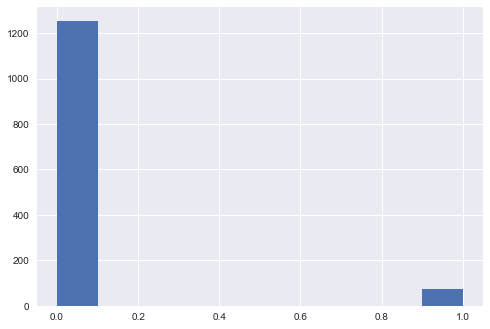

In [39]:
import pylab as pl
days_share_view = share_df[share_df["num_of_day_from_share_view"]<=7]
len(share_df),len(days_share_view)
h = sorted(days_share_view["num_of_day_from_share_view"]) #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')

pl.hist(h)
pl

In [40]:
len(share_df),len(days_share_view)

(1325, 1325)

In [41]:
# uniq_titles = np.sort(share_df.title_of_content.unique())
# uniq_title_num_share = share_df.groupby("title_of_content")["activity_type"].count()
# #uniq_titles 
# uniq_title_num_share

In [42]:
# import pylab as pl
# h = sorted(share_df["time_spent_mins"])  #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')

# pl.hist(h,normed=True)


In [43]:
#share_df["weekday"].plot.kde()

In [44]:
# plot = plt.bar(xrange(0,7),(share_df.groupby("weekday")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,7),["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
# share_weekday = share_df.groupby("weekday")["time_spent_mins"].sum()

In [45]:
# plot = plt.bar(xrange(0,7),(share_df.groupby("month")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [46]:
# import pylab as pl
# new_share = share_df[share_df["time_spent_mins"]<=8]
# h = sorted(new_share["time_spent_mins"])  #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')
# pl.axvline(x=np.mean(h)+np.std(h),color='r', linestyle='--')
# pl.axvline(x=np.mean(h)-np.std(h),color='r', linestyle='--')
# pl.hist(h,normed=True)


In [47]:
#h = plt.hist(share_df.time_spent_mins)

In [48]:
#sns.stripplot(x="share_channel", y="time_spent_mins", data=share_df)
df.share_channel.unique()


array([nan, 'ANDROID', 'IOS', 'WEB', 'OUTLOOK'], dtype=object)

([<matplotlib.axis.XTick at 0x11d20bc90>,
 <a list of 4 Text xticklabel objects>)

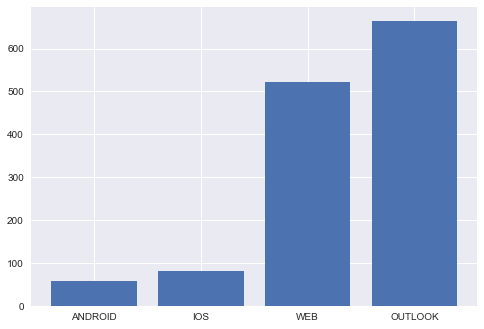

In [49]:
plt.bar(xrange(0,4),(share_df.groupby("share_channel")["time_spent_mins"].count()))
plt.xticks(xrange(0,4),['ANDROID', 'IOS', 'WEB', 'OUTLOOK'])
# plt.xlabel("Share Channel")
# plt.ylabel("Number of Shares")
# plt.title("TW - Num Shares Vs Share Channel")

In [50]:
#sns.stripplot(x="time_of_day", y="time_spent_mins", data=share_df)


# VIEW DATA ANALYSIS

In [51]:
view_df = df[(df.activity_type == "VIEW")]
view_df = view_df.drop(["share_channel", "user_groups", "shared_date", "shared_time", "rm_id"], axis =1)
view_df.describe()

,user_id,viewed,time_spent_in_seconds,unnamed:_14,unnamed:_16,weekday,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view
count,5.011000e+03,5011.0,5011.000000,0.0,0.0,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.0
mean,3.434546e+06,1.0,184.795250,NaN,NaN,2.440830,4.985831,2.613650,11.008781,-0.104989,0.0
std,1.708027e+06,0.0,526.199999,NaN,NaN,1.681009,1.859431,1.094354,7.125670,0.124769,0.0
min,1.286000e+03,1.0,0.000000,NaN,NaN,0.000000,2.000000,1.000000,0.000000,-0.148806,0.0
25%,2.733028e+06,1.0,10.000000,NaN,NaN,1.000000,3.000000,2.000000,5.000000,-0.146435,0.0
50%,3.278481e+06,1.0,25.000000,NaN,NaN,2.000000,5.000000,3.000000,10.000000,-0.142878,0.0
75%,4.932006e+06,1.0,101.500000,NaN,NaN,4.000000,6.000000,4.000000,17.000000,-0.124739,0.0
max,5.979633e+06,1.0,7200.000000,NaN,NaN,6.000000,8.000000,4.000000,23.000000,1.558411,0.0


In [52]:
len(view_df), len(view_df.user_id.unique())

(5011, 665)

In [53]:
view_df.columns

Index([u'activity_type', u'user_id', u'viewing_device', u'browser',
       u'title_of_content', u'viewed', u'time_spent_in_seconds',
       u'last_activity_date', u'last_activity_time', u'unnamed:_14',
       u'unnamed:_15', u'unnamed:_16', u'weekday', u'weekday_name', u'month',
       u'time_of_day', u'hour', u'time_spent_mins',
       u'num_of_day_from_share_view'],
      dtype='object')

In [54]:
views_per_share = len(view_df)/float(len(share_df))
views_per_share

3.78188679245283

In [55]:
len(view_df.title_of_content.unique())


685

(array([  4.66300000e+03,   1.86000000e+02,   7.30000000e+01,
          3.90000000e+01,   2.60000000e+01,   1.80000000e+01,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          5.00000000e+00]),
 array([-0.14880628,  0.0219154 ,  0.19263708,  0.36335876,  0.53408044,
         0.70480211,  0.87552379,  1.04624547,  1.21696715,  1.38768883,
         1.5584105 ]),
 <a list of 10 Patch objects>)

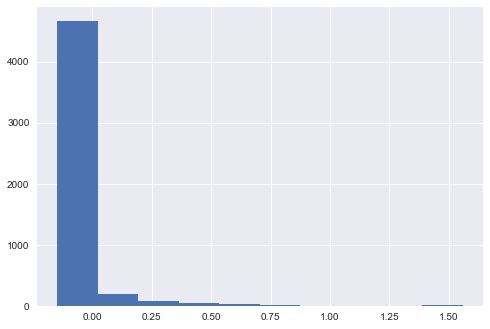

In [56]:
plt.hist(view_df["time_spent_mins"])

# NEW ANALYSIS -- Start

In [57]:
from collections import Counter
user_id_list = [j.user_id for i,j in df.iterrows() if j["activity_type"] == "VIEW"]
num_views = Counter(user_id_list)
best, views = {}, []
#best = sorted(num_views, key=lambda x : num_views[x])
for k,v in num_views.iteritems():
    if v>=2 and v<20:
        best[k] = v
        views.append(v)


In [58]:
len(num_views), len(best), np.array(views).mean(),np.array(views).max(), np.array(views).min()

(665, 369, 4.7777777777777777, 19, 2)

In [59]:
best

{1286.0: 10,
 205963.0: 17,
 207131.0: 5,
 211675.0: 10,
 230605.0: 13,
 268228.0: 5,
 346016.0: 7,
 474895.0: 2,
 1050918.0: 12,
 1051881.0: 3,
 1051885.0: 6,
 1051893.0: 3,
 1051897.0: 3,
 1051905.0: 9,
 1051909.0: 8,
 1051913.0: 10,
 1051917.0: 5,
 1051925.0: 5,
 1051929.0: 11,
 1051941.0: 9,
 1051949.0: 9,
 1051953.0: 14,
 1051961.0: 11,
 1051973.0: 14,
 1051977.0: 5,
 1051981.0: 13,
 1051985.0: 4,
 1051993.0: 4,
 1052013.0: 15,
 1052025.0: 12,
 1052029.0: 12,
 1052349.0: 2,
 1052471.0: 4,
 1052615.0: 3,
 1052830.0: 4,
 1053064.0: 4,
 1053417.0: 3,
 1053496.0: 3,
 1053514.0: 5,
 1053623.0: 2,
 1053999.0: 7,
 1054042.0: 4,
 1054077.0: 2,
 1054105.0: 2,
 1054141.0: 2,
 1054475.0: 2,
 1055906.0: 17,
 1056795.0: 4,
 1057140.0: 3,
 1057210.0: 2,
 1057621.0: 3,
 1389531.0: 2,
 1557433.0: 3,
 1835127.0: 7,
 1904675.0: 6,
 1911028.0: 2,
 1984750.0: 3,
 2069490.0: 2,
 2118564.0: 6,
 2241865.0: 10,
 2264676.0: 2,
 2639930.0: 6,
 2659829.0: 2,
 2659834.0: 2,
 2659891.0: 5,
 2692754.0: 17,
 27

(array([ 178.,  101.,   33.,    4.,   18.,   15.,    5.,    5.,    5.,    5.]),
 array([  2. ,   3.7,   5.4,   7.1,   8.8,  10.5,  12.2,  13.9,  15.6,
         17.3,  19. ]),
 <a list of 10 Patch objects>)

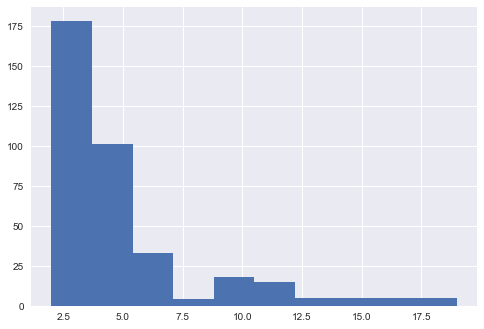

In [60]:
plt.hist([v for v in views if v>1 and v<20])

In [61]:
conv_ids = []
for k,v in num_views.iteritems(): 
    if v>5 and v<15:
        conv_ids.append(k)
conv_ids, len(conv_ids)

([4915226.0,
  2639930.0,
  3661886.0,
  3029055.0,
  5031947.0,
  3661903.0,
  3661908.0,
  5316969.0,
  3199114.0,
  5200070.0,
  1904675.0,
  1052029.0,
  1050918.0,
  5220703.0,
  4931962.0,
  4931968.0,
  5747100.0,
  2978304.0,
  2742799.0,
  5964306.0,
  4369864.0,
  5772442.0,
  3371711.0,
  3666636.0,
  4788948.0,
  211675.0,
  5522141.0,
  4350709.0,
  3322677.0,
  5055329.0,
  2118564.0,
  3906487.0,
  5211072.0,
  5696010.0,
  5110898.0,
  5254340.0,
  230605.0,
  3157225.0,
  1051885.0,
  1051905.0,
  1051909.0,
  1286.0,
  1051913.0,
  1051929.0,
  1051941.0,
  1051949.0,
  1053999.0,
  1051953.0,
  1051973.0,
  1051981.0,
  5498203.0,
  1052025.0,
  5105033.0,
  5649805.0,
  5200795.0,
  2975145.0,
  5682614.0,
  5862856.0,
  1835127.0,
  3126549.0,
  5391938.0,
  2983543.0,
  3999393.0,
  3475107.0,
  5349029.0,
  4900525.0,
  5496501.0,
  2954945.0,
  2891523.0,
  5752590.0,
  5555991.0,
  5711650.0,
  5087544.0,
  1051961.0,
  346016.0,
  2241865.0,
  4906989.0,
  548

In [62]:
view_df["conv_id"] = view_df["viewed"]
test_df = view_df
conv_df = pd.DataFrame()
for i in xrange(len(conv_ids)):
    temp_df = view_df[view_df["user_id"] == conv_ids[i]]
    conv_df = conv_df.append(temp_df)
    test_df.drop(test_df["user_id"] == conv_ids[i])
    

In [63]:
conv_df.describe()

,user_id,viewed,time_spent_in_seconds,unnamed:_14,unnamed:_16,weekday,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view,conv_id
count,6.940000e+02,694.0,694.000000,0.0,0.0,694.000000,694.000000,694.000000,694.000000,694.000000,694.0,694.0
mean,3.423955e+06,1.0,172.221902,NaN,NaN,2.567723,5.579251,2.479827,12.239193,-0.107970,0.0,1.0
std,1.888760e+06,0.0,472.217931,NaN,NaN,1.604610,1.703549,1.113487,7.148224,0.111969,0.0,0.0
min,1.286000e+03,1.0,0.000000,NaN,NaN,0.000000,2.000000,1.000000,0.000000,-0.148806,0.0,1.0
25%,1.052025e+06,1.0,10.000000,NaN,NaN,1.000000,4.000000,2.000000,7.000000,-0.146435,0.0,1.0
50%,3.661903e+06,1.0,35.000000,NaN,NaN,3.000000,6.000000,2.000000,12.000000,-0.140507,0.0,1.0
75%,5.200795e+06,1.0,120.000000,NaN,NaN,4.000000,7.000000,3.750000,19.000000,-0.120353,0.0,1.0
max,5.964306e+06,1.0,4005.000000,NaN,NaN,6.000000,8.000000,4.000000,23.000000,0.800833,0.0,1.0


In [64]:
test_df["conv_id"].replace({1:0}, inplace= True)
for k,v in num_views.iteritems():
    test_df.loc[test_df['user_id'] == k, 'num_of_views'] = v
    test_df.loc[test_df['user_id'] == k, 'total_time_mins'] = test_df[test_df["user_id"] == k]["time_spent_mins"].sum()

test_df.weekday_name.replace({0:"Sunday", 1:"Monday"}, inplace= True)
test_df.head()

,activity_type,user_id,viewing_device,browser,title_of_content,viewed,time_spent_in_seconds,last_activity_date,last_activity_time,unnamed:_14,...,weekday,weekday_name,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view,conv_id,num_of_views,total_time_mins
0,VIEW,1051909.0,Phone,SAFARI,Mutual Fund Online - I,1.0,5.0,2017-08-25,19:29:04,NaN,...,4.0,Friday,8.0,2.0,19.0,-0.147621,0,0.0,8.0,-1.120502
1,VIEW,1052025.0,Phone,SAFARI,SWIFT CODES JPY,1.0,120.0,2017-08-25,9:53:39,NaN,...,4.0,Friday,8.0,4.0,9.0,-0.120353,0,0.0,12.0,-1.540263
2,VIEW,1052025.0,Phone,SAFARI,Q1FY17 Press Release_Final,1.0,120.0,2017-08-25,9:41:15,NaN,...,4.0,Friday,8.0,4.0,9.0,-0.120353,0,0.0,12.0,-1.540263
6,VIEW,1051973.0,Phone,CHROME_MOBILE,ICICI Pru Balanced,1.0,120.0,2017-08-23,20:39:43,NaN,...,2.0,Wednesday,8.0,2.0,20.0,-0.120353,0,0.0,14.0,-1.907824
7,VIEW,1052025.0,Phone,SAFARI,GIB Knowledge Series,1.0,220.0,2017-08-17,20:43:48,NaN,...,3.0,Thursday,8.0,2.0,20.0,-0.096641,0,0.0,12.0,-1.540263


In [65]:
test_df = view_df.append(conv_df)
test_df["weekday_name"].unique()

array(['Friday', 'Wednesday', 'Thursday', 'Saturday', 'Tuesday', 'Monday',
       'Sunday'], dtype=object)

In [66]:
test_df

,activity_type,browser,conv_id,hour,last_activity_date,last_activity_time,month,num_of_day_from_share_view,num_of_views,time_of_day,...,title_of_content,total_time_mins,unnamed:_14,unnamed:_15,unnamed:_16,user_id,viewed,viewing_device,weekday,weekday_name
0,VIEW,SAFARI,0.0,19.0,2017-08-25,19:29:04,8.0,0,8.0,2.0,...,Mutual Fund Online - I,-1.120502,NaN,NaN,NaN,1051909.0,1.0,Phone,4.0,Friday
1,VIEW,SAFARI,0.0,9.0,2017-08-25,9:53:39,8.0,0,12.0,4.0,...,SWIFT CODES JPY,-1.540263,NaN,SWIFT CODES JPY,NaN,1052025.0,1.0,Phone,4.0,Friday
2,VIEW,SAFARI,0.0,9.0,2017-08-25,9:41:15,8.0,0,12.0,4.0,...,Q1FY17 Press Release_Final,-1.540263,NaN,Q1FY17 Press Release_Final,NaN,1052025.0,1.0,Phone,4.0,Friday
6,VIEW,CHROME_MOBILE,0.0,20.0,2017-08-23,20:39:43,8.0,0,14.0,2.0,...,ICICI Pru Balanced,-1.907824,NaN,NaN,NaN,1051973.0,1.0,Phone,2.0,Wednesday
7,VIEW,SAFARI,0.0,20.0,2017-08-17,20:43:48,8.0,0,12.0,2.0,...,GIB Knowledge Series,-1.540263,NaN,GIB Knowledge Series,NaN,1052025.0,1.0,Phone,3.0,Thursday
8,VIEW,SAFARI,0.0,21.0,2017-08-12,21:22:24,8.0,0,10.0,2.0,...,Mutual Fund Online - I,-1.209454,NaN,NaN,NaN,1051913.0,1.0,Phone,5.0,Saturday
9,VIEW,SAFARI,0.0,21.0,2017-08-12,21:07:16,8.0,0,10.0,2.0,...,Reliance Arbitrage Adv,-1.209454,NaN,NaN,NaN,1051913.0,1.0,Phone,5.0,Saturday
10,VIEW,SAFARI,0.0,22.0,2017-08-11,22:52:17,8.0,0,9.0,2.0,...,User Manual,-1.220700,NaN,NaN,NaN,1051905.0,1.0,Phone,4.0,Friday
11,VIEW,CHROME_MOBILE,0.0,11.0,2017-08-11,11:55:42,8.0,0,31.0,4.0,...,Verification of KYC documents through Webcam f...,-4.260881,NaN,NaN,NaN,1052009.0,1.0,Phone,4.0,Friday
12,VIEW,SAFARI,0.0,9.0,2017-08-10,9:59:15,8.0,0,5.0,4.0,...,SBI Bluechip Reg,-0.715578,NaN,NaN,NaN,1051977.0,1.0,Phone,3.0,Thursday


In [67]:
dummies = pd.get_dummies(test_df, columns=["viewing_device", "weekday_name", "time_of_day", "browser"])

In [68]:
test_df = pd.concat([test_df, dummies])
test_df = test_df.drop(["viewing_device", "weekday_name", "time_of_day", "browser"], axis=1)
test_df.columns

Index([u'activity_type', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX', u'browser_IE',
       u'browser_MOBILE_SAFARI', u'browser_SAFARI', u'conv_id', u'hour',
       u'last_activity_date', u'last_activity_time', u'month',
       u'num_of_day_from_share_view', u'num_of_views', u'time_of_day_1.0',
       u'time_of_day_2.0', u'time_of_day_3.0', u'time_of_day_4.0',
       u'time_spent_in_seconds', u'time_spent_mins', u'title_of_content',
       u'total_time_mins', u'unnamed:_14', u'unnamed:_15', u'unnamed:_16',
       u'user_id', u'viewed', u'viewing_device_Laptop/Desktop',
       u'viewing_device_Phone', u'viewing_device_Tablet', u'weekday',
       u'weekday_name_Friday', u'weekday_name_Monday',
       u'weekday_name_Saturday', u'weekday_name_Sunday',
       u'weekday_name_Thursday', u'weekday_name_Tuesday',
       u'weekday_name_Wednesday'],
      dtype='object')

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
test_df.fillna(0, inplace= True)
len(test_df)
x = test_df.as_matrix(columns= [u'time_of_day_1', u'time_of_day_2', u'time_of_day_3', u'time_of_day_4',u'viewing_device_Laptop/Desktop',
       u'viewing_device_Phone', u'viewing_device_Tablet',
        u'weekday_name_Friday', u'weekday_name_Monday',
       u'weekday_name_Saturday', u'weekday_name_Sunday',
       u'weekday_name_Thursday', u'weekday_name_Tuesday',
       u'weekday_name_Wednesday', 'num_of_views', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX', u'browser_FIREFOX_MOBILE',
       u'browser_IE', u'browser_MOBILE_SAFARI', u'browser_OPERA',
       u'browser_SAFARI'])
y = test_df.as_matrix(columns= ["time_spent_mins"])

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [72]:
Model = LinearRegression()
Model.fit(x_train, y_train)
Model.predict(x_test)
Model.score(x_test,y_test), Model.coef_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
test_df.dropna(how= "any", inplace= True)
len(test_df)
x1 = test_df.as_matrix(columns= [u'time_of_day_1', u'time_of_day_2', u'time_of_day_3', u'time_of_day_4',u'viewing_device_Laptop/Desktop',
       u'viewing_device_Phone', u'viewing_device_Tablet',
        u'weekday_name_Friday', u'weekday_name_Monday',
       u'weekday_name_Saturday', u'weekday_name_Sunday',
       u'weekday_name_Thursday', u'weekday_name_Tuesday',
       u'weekday_name_Wednesday', 'num_of_views', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX', u'browser_FIREFOX_MOBILE',
       u'browser_IE', u'browser_MOBILE_SAFARI', u'browser_OPERA',
       u'browser_SAFARI', "time_spent_mins"])
y1 = test_df.as_matrix(columns= [u'conv_id'])

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1)

In [ ]:
Model1 = LogisticRegression()
Model1.fit(x1_train, y1_train)
Model1.predict(x1_test)
Model1.score(x1_test,y1_test), Model1.coef_

In [ ]:
conv_df.title_of_content.unique()

In [ ]:
len(conv_df)

In [ ]:
plt.bar(xrange(0,len(conv_df.groupby("browser")["time_spent_mins"].count())), conv_df.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])

In [ ]:
plt.bar(xrange(0,7), conv_df.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

In [ ]:
plt.bar(xrange(0,4), conv_df.groupby("time_of_day")["time_spent_mins"].count())
plt.xticks(xrange(0,4),["Morning", "Afternoon", "Evening", "Night"])

In [ ]:
plt.bar(xrange(0,len(conv_df.groupby("viewing_device")["time_spent_mins"].count())), conv_df.groupby("viewing_device")["time_spent_mins"].count())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,7), conv_df.groupby("month")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
#### import pylab as pl
new_view = view_df[view_df["time_spent_mins"] <= 6]
len(new_view) #(20 mins, 1874/2085, 10% reduced) (12 mins, 1746/2085, 16% reduced)(6 mins, 1607/2085, 23% reduced)
# (4 mins, 1513/2085, 28% reduced)

h = sorted(new_view["time_spent_mins"])  #sorted

fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h, normed= True)

pl.axvline(x = np.mean(h), linestyle='--')
pl.axvline(x = np.mean(h) + np.std(h), linestyle='--')
pl.axvline(x = np.mean(h) + 2*np.std(h), linestyle='--')


In [ ]:
new_view.describe()

In [ ]:
plt.hist(new_view["time_spent_mins"])

In [ ]:
sorted(view_df.browser.unique())

In [ ]:
plt.bar(xrange(0,len(view_df.groupby("browser")["time_spent_mins"].sum())), view_df.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])
# plt.xlabel("Viewing Application")
# plt.ylabel("Total View Time in Minutes")
# plt.title("Time Spent Vs View App")

In [ ]:
plt.bar(xrange(0,len(view_df.groupby("browser")["time_spent_mins"].sum())), new_view.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])

In [ ]:
plt.bar(xrange(0,4), view_df.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])
# plt.xlabel("Time of Day")
# plt.ylabel("Total View Time in Minutes")
# plt.title("TW - Time Spent Vs Time of Day")

In [ ]:
plt.bar(xrange(0,4), new_view.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])

In [ ]:
def get_view_time_per_user(unique_users, view_df):
    for user in unique_users:
        temp_time = view_df["user_id"]

In [ ]:
plt.bar(xrange(0,7), view_df.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
#plt.xlabel("Day of Week")
#plt.ylabel("Total View Time in Minutes")
#plt.title("TW - Time Spent Vs Day of Week")

In [ ]:
plt.bar(xrange(0,7), new_view.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

In [ ]:
# Get the time spent on different apps
# def get_time_spent(view_df):
#     time_spent_secs = view_df["time_spent_in_seconds"].sum()
#     view_apps = view_df["view_app_group"].unique()

#     time_spent_dict = {}
#     for v in view_apps:
#         temp_time = view_df[view_df.view_app_group == v]["time_spent_in_seconds"].sum()
#         time_spent_dict[v] = [temp_time, float(temp_time)*100/time_spent_secs]
#     return time_spent_dict

# get_time_spent(view_df)

In [ ]:
plt.bar(xrange(0,3), view_df.groupby("viewing_device")["time_spent_mins"].sum())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,3), new_view.groupby("viewing_device")["time_spent_mins"].sum())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,3), new_view.groupby("viewing_device")["time_spent_mins"].count())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
#sns.stripplot(x="view_app_group", y="time_spent_mins", data=view_df)
#plt.bar(xrange(0,8), view_df.groupby("view_app_group")["time_spent_mins"].sum())

In [ ]:
#sns.boxplot(x="view_app_group", y="time_spent_mins", data=view_df, hue = "view_app_group")


In [ ]:
#sns.barplot(x="view_app_group", y="time_spent_mins", data=view_df, hue = "view_app_group")


In [ ]:
#sns.countplot(x="view_app_group", data=view_df, hue = "view_app_group")


In [ ]:
#plt.bar(xrange(0,9),view_df.groupby("view_app_group")["time_spent_mins"].sum())

In [ ]:
#sns.stripplot(x=view_df["view_app_group"], y=view_df["time_spent_mins"], data=view_df, jitter=True)


In [ ]:
#sns.stripplot(x=view_df["weekday"], y=view_df["time_spent_mins"], data=view_df, jitter=True)



In [ ]:
plt.bar(xrange(0,7), view_df.groupby("month")["time_spent_mins"].sum())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
plt.bar(xrange(0,7), new_view.groupby("month")["time_spent_mins"].sum())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
plt.bar(xrange(0,7), view_df.groupby("month")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
share_df.columns


In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
X = share_df.as_matrix(["time_spent_mins", "num_of_day_from_share_view", u'weekday', "time_of_day", "month"])
# not printed as pretty, but the values are correct
# distxy = squareform(pdist(cluster_df, metric='cosine'))
# print distxy
Z = linkage(X, 'ward')
R = dendrogram(Z)
plt.show()

In [ ]:
R["ivl"]

In [ ]:
R1 = dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [ ]:
R1

In [ ]:
[u'activity_type', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX', u'browser_IE',
       u'browser_MOBILE_SAFARI', u'browser_SAFARI', u'conv_id', u'hour',
       u'last_activity_date', u'last_activity_time', u'month',
       u'num_of_day_from_share_view', u'num_of_views', u'time_of_day_1.0',
       u'time_of_day_2.0', u'time_of_day_3.0', u'time_of_day_4.0',
       u'time_spent_in_seconds', u'time_spent_mins', u'title_of_content',
       u'total_time_mins', u'unnamed:_14', u'unnamed:_15', u'unnamed:_16',
       u'user_id', u'viewed', u'viewing_device_Laptop/Desktop',
       u'viewing_device_Phone', u'viewing_device_Tablet', u'weekday',
       u'weekday_name_Friday', u'weekday_name_Monday',
       u'weekday_name_Saturday', u'weekday_name_Sunday',
       u'weekday_name_Thursday', u'weekday_name_Tuesday',
       u'weekday_name_Wednesday']

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
X = view_df.as_matrix(["time_spent_mins", 'weekday_name_Friday',
 u'weekday_name_Monday',
 u'weekday_name_Saturday',
 u'weekday_name_Sunday',
 u'weekday_name_Thursday',
 u'weekday_name_Tuesday',
 u'weekday_name_Wednesday'])
# not printed as pretty, but the values are correct
# distxy = squareform(pdist(cluster_df, metric='cosine'))
# print distxy
Z = linkage(X, 'ward')
R1 = dendrogram(Z)
plt.show()

In [ ]:
R1


In [ ]:
R1["ivl"]

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
X = view_df.as_matrix(["time_spent_mins", "num_of_day_from_share_view"])
# not printed as pretty, but the values are correct
# distxy = squareform(pdist(cluster_df, metric='cosine'))
# print distxy
Z = linkage(X, 'ward')
dendrogram(Z)
plt.show()